In [ ]:
import pandas as pd
df=pd.read_csv('raw_ppg.csv')

In [ ]:
df1=df.reset_index()['ppg'][0:579]

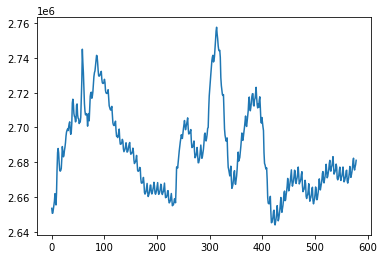

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(376, 203)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(365, 10)
(365,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(192, 10)
(192,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0] ,X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1 )

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(time_step,1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25)                2700      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,726
Trainable params: 2,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=240, verbose=1)

Epoch 1/1000
2/2 [==============================] - 2s 24ms/step - loss: 0.1697
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1366
Epoch 3/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1157
Epoch 4/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0906
Epoch 5/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0719
Epoch 6/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.0555
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.0418
Epoch 8/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0281
Epoch 9/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.0208
Epoch 10/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.0150
Epoch 11/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106
Epoch 12/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.0114
Epoch 13/1000
2/2 [==================

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
y_train=scaler.inverse_transform([y_train])
ytest=scaler.inverse_transform([ytest])

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train[0],train_predict[:,0]))

4375.8428768693175

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest[0],test_predict[:,0]))

4024.2381388664476

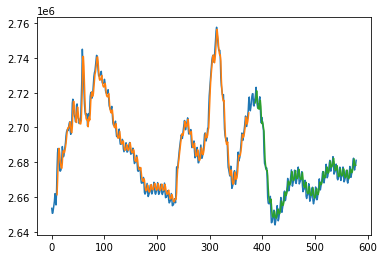

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

203

In [ ]:
x_input=test_data[193:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
df_test3 = pd.read_csv('raw_ppg.csv')
df_test2=df_test3.reset_index()['ppg'][579:600]
df_test2=scaler.fit_transform(np.array(df_test2).reshape(-1,1))
#print(len(df_test2))

In [ ]:
confidence=[1]
#print(confidence)

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<20):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        # Confidence Calculation
        difference=abs(df_test2[i]-yhat[0])
        print("Difference",difference)
        abc = (0.20*math.log(2))/difference
        cl = 0.90*confidence[i] + 0.10*(math.exp(abc)-1)
        if(cl>1): cl=1
        if(cl<0): cl=0
        print("Confidence Level",cl);
        confidence.append(cl)
        temp_input.extend(df_test2[i].tolist())
        # if(abs(df_test2[i]-yhat[0])<0.40):
        #   temp_input.extend(df_test2[i].tolist())
        # else:
        #   temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())

        # if(difference<0.40):
        #    cl=0.65*confidence[i]+0.35*(difference/yhat[0])
        # else:
        #   cl=0.65*confidence[i]-0.35*(difference/yhat[0])
        
        # cl=0.65*confidence[i]+0.35*((0.4-difference)/abs(yhat[0]))
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        # print(df_test2[0])
        difference=abs(df_test2[0]-yhat[0])
        # if(difference<0.40):
        #    cl=0.65*confidence[i]+0.35*(difference/yhat[0])
        # else:
        #   cl=0.65*confidence[i]-0.35*(difference/yhat[0])
        print("Difference",difference)
        abc = (0.2*math.log(2))/difference
        # abc = ((0.4-difference)*math.log(2))/0.4
        cl = 0.90*confidence[i] + 0.10*(math.exp(abc)-1)
        # cl=0.65*confidence[i]+0.35*((0.4-difference)/abs(yhat[0]))
        if(cl>1): cl=1
        if(cl<0): cl=0
        print("Confidence Level",cl);
        confidence.append(cl)
        # if(abs(df_test2[0]-yhat[0])<0.40):
        #   temp_input.extend(df_test2[0].tolist())
        # else:
        #   temp_input.extend(yhat[0].tolist())
        temp_input.extend(df_test2[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.32222715]
Difference [0.17256046]
Confidence Level 1
11
1 day input [0.26901186 0.29059289 0.3221783  0.33741765 0.28898551 0.27777778
 0.29346509 0.30513834 0.32669302 0.49478761]
1 day output [[0.4277165]]
Difference [0.13405416]
Confidence Level 1
2 day input [0.29059289 0.3221783  0.33741765 0.28898551 0.27777778 0.29346509
 0.30513834 0.32669302 0.49478761 0.56177066]
2 day output [[0.5239505]]
Difference [0.41106737]
Confidence Level 0.9401078952087912
3 day input [0.3221783  0.33741765 0.28898551 0.27777778 0.29346509 0.30513834
 0.32669302 0.49478761 0.56177066 0.11288315]
3 day output [[0.29545754]]
Difference [0.29545754]
Confidence Level 0.9059689865060668
4 day input [0.33741765 0.28898551 0.27777778 0.29346509 0.30513834 0.32669302
 0.49478761 0.56177066 0.11288315 0.        ]
4 day output [[0.1332486]]
Difference [0.02472207]
Confidence Level 1
5 day input [0.28898551 0.27777778 0.29346509 0.30513834 0.32669302 0.49478761
 0.56177066 0.11288315 0.         0.10852653]
5

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,31)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

579

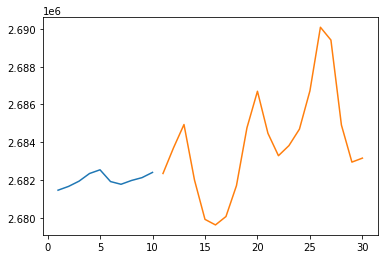

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[569:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

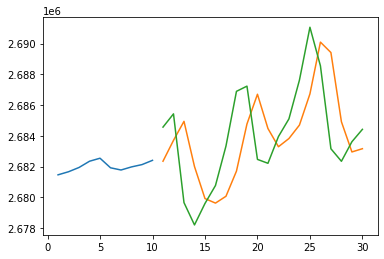

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[569:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_pred,scaler.inverse_transform(df_test2))

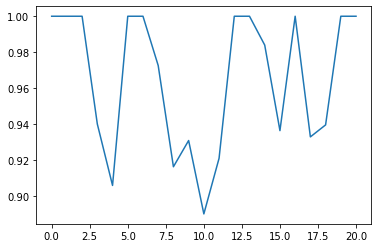

In [ ]:
plt.plot(confidence)

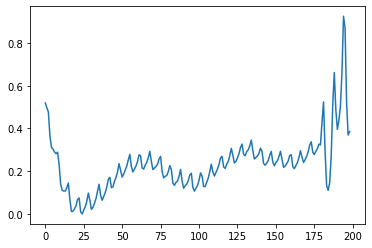

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[400:])

In [ ]:
df_test1 = pd.read_csv('ppg_test.csv')
df_test=df_test1.reset_index()['ppg']
df_test=scaler.fit_transform(np.array(df_test).reshape(-1,1))
# print(df_test[0:1])

FileNotFoundError: ignored

ConversionError: ignored

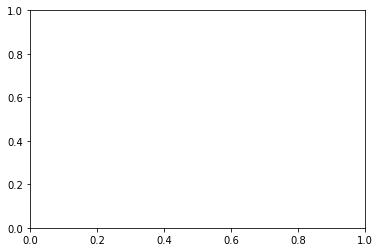

In [ ]:
plt.plot(df)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)